In [2]:
import os
from pathlib import Path

import gdown
from zipfile import ZipFile

import polars as pl
from typing import List, Tuple

import math
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def download_data(id: str,
                  folder: str = ".",
                  filezip: str = "data.zip",
                  remove_zip: bool = True,
                  quiet: bool = False) -> List[str]:
  """A function to download a zip archive given a google drive id.

  Args:
    - id (str): The google drive id.
    - folder (str): The folder where the data is going to be saved. Default '.'.
    - filezip (str): A name for the file.zip. Default 'data.zip'.
    - remove_zip (bool): If True remove the zip archive. Default True.
    - quiet (bool): If False running info of the function are shown. Default False.

  Returns:
    - files (List[str]): The list of the files.
  """
  folder = Path(folder)

  # We create the folder if it doesn't exist
  if not folder.exists(): os.mkdir(folder)

  # Update the path towards the filezip
  filezip = folder / filezip

  # We download the data
  gdown.download(id=id, output=str(filezip), quiet=quiet)

  with ZipFile(filezip, 'r') as zip:
    # We extract the data
    zip.extractall(folder)

    # Get the file name
    files: List[str] = zip.namelist()
    
  if not quiet: print(f"\nRemoving {filezip}", end="")
  if remove_zip:
    os.remove(filezip)
  if not quiet: print(f", done.")

  return files

In [4]:
id = "1mjX1vZr2rdAIR-jXEYJnpgctdZ3XoHBA"
folder = Path("data")
files = download_data(id, folder=folder)


data = pl.read_csv(folder/'*.csv')

Downloading...
From: https://drive.google.com/uc?id=1mjX1vZr2rdAIR-jXEYJnpgctdZ3XoHBA
To: /content/data/data.zip
100%|██████████| 43.3M/43.3M [00:01<00:00, 26.6MB/s]



Removing data/data.zip, done.


In [5]:
palette = sns.color_palette("hls", 4)

# EDA

## Brief overview

In [6]:
data.head()

Job_ID,Task_ID,Arrival_Time,CPU,Memory
i64,i64,i64,f64,f64
375000667413,0,603026300,0.041851,0.001169
375000669289,0,606413041,0.024968,0.001179
375000670586,0,608994453,0.024176,0.001173
375000670588,0,608994466,0.019552,0.001163
375000670590,0,609042903,0.028044,0.001179


In [7]:
data = data.filter((pl.col("CPU") != 0)&(pl.col("Memory") != 0)).with_columns(pl.col("CPU")*1e06)

In [8]:
data.describe()

describe,Job_ID,Task_ID,Arrival_Time,CPU,Memory
str,f64,f64,f64,f64,f64
"""count""",2.282781e6,2.282781e6,2.282781e6,2.282781e6,2.282781e6
"""null_count""",0.0,0.0,0.0,0.0,0.0
"""mean""",3.8521e11,115.829249,1.1426e12,4.0415e6,0.001525
"""std""",6.9733e9,406.26953,7.1179e11,1.3709e8,0.005124
"""min""",3.7500e11,0.0,6.030263e8,0.953674,9.5367e-7
"""max""",4.0047e11,2997.0,2.6790e12,5.2787e10,0.410645
"""median""",3.8284e11,0.0,1.0102e12,76977.729797,0.000892
"""25%""",3.8086e11,0.0,5.9531e11,27309.417725,0.000548
"""75%""",3.8556e11,17.0,1.6577e12,274619.102478,0.001125


### Boxplots 

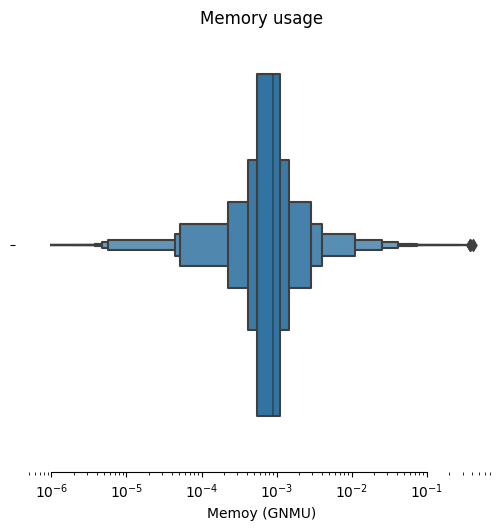

In [9]:
sns.catplot(data.to_pandas(),
            x="Memory",
            k_depth="trustworthy",
            kind="boxen").set(title="Memory usage",
                              xscale="log",
                              xlabel="Memoy (GNMU)")
sns.despine(trim=True, offset=10)
plt.show()

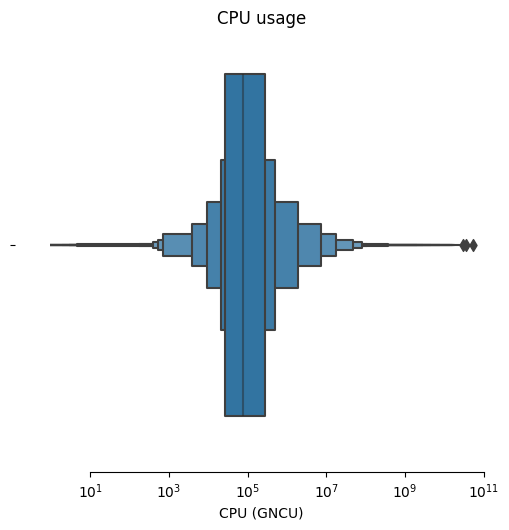

In [ ]:
sns.catplot(data.to_pandas(),
            x="CPU",
            k_depth="trustworthy",
            kind="boxen").set(title="CPU usage",
                              xscale="log",
                              xlabel="CPU (GNCU)")
sns.despine(trim=True, offset=10)
plt.show()

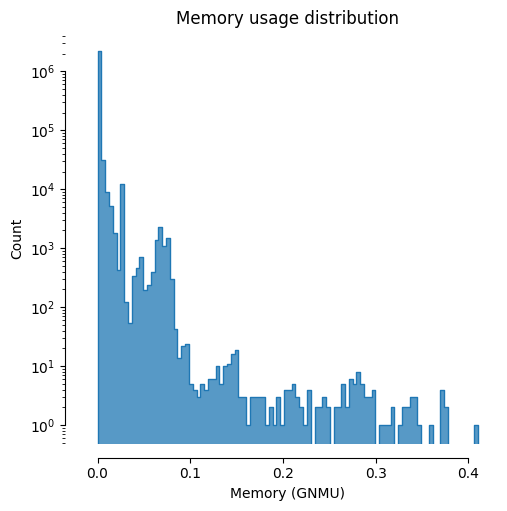

In [ ]:
sns.displot(data,
            x="Memory",
            bins=100,
            element="step").set(title="Memory usage distribution",
                                xlabel="Memory (GNMU)",
                                yscale="log")
sns.despine(trim=True, offset=10)
plt.show()

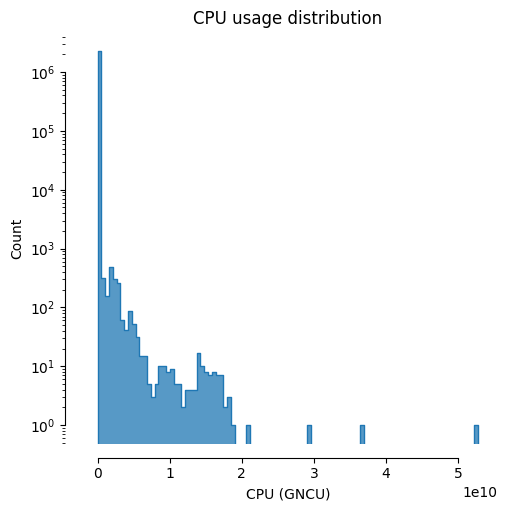

In [ ]:
sns.displot(data,
            x="CPU",
            bins=100,
            element="step").set(title="CPU usage distribution",
                                xlabel="CPU (GNCU)",
                                yscale="log")
sns.despine(trim=True, offset=10)
plt.show()

## Getting a dataframe with summary statistics

### Number of tasks for jobs

In [10]:
def round_tasks(x: float):
  """A function that rounds a given number near a specific number.

  Args:
    - x (float): The number to round up. 
  
  Returns:
    - result (int): The rounded number.
  """
  if x == 1: return '1'
  if x < 100:
    return "2-99"#"2-9"
  
  order = 10**int(math.floor(math.log(x, 10)))

  return f"{order}-{order*10-1}"

In [11]:
num_tasks = data.groupby(by=["Job_ID"]).agg(pl.col(['Task_ID']).count().alias('num_tasks')).with_columns((pl.col("num_tasks").apply(round_tasks)).alias('task_category')).sort(by=["num_tasks"])
num_tasks

Job_ID,num_tasks,task_category
i64,u32,str
382205211458,1,"""1"""
380965072802,1,"""1"""
382169143584,1,"""1"""
382796980986,1,"""1"""
394030955874,1,"""1"""
382432457134,1,"""1"""
383873743962,1,"""1"""
380996498826,1,"""1"""
383824293426,1,"""1"""


### CPU usage

In [12]:
cpu_usage = data.groupby(by=["Job_ID"]).agg(pl.col(['CPU']).sum().alias('CPU_tot'),
                                            pl.col(['CPU']).max().alias('CPU_max'),
                                            pl.col(['CPU']).min().alias('CPU_min'),
                                            pl.col(['CPU']).mean().alias('CPU_mean'),
                                            pl.col(['CPU']).std().alias('CPU_std')).sort(by=["CPU_tot"])
cpu_usage

Job_ID,CPU_tot,CPU_max,CPU_min,CPU_mean,CPU_std
i64,f64,f64,f64,f64,f64
385100920758,0.953674,0.953674,0.953674,0.953674,0.0
382064029046,0.953674,0.953674,0.953674,0.953674,0.0
397611001783,0.953674,0.953674,0.953674,0.953674,0.0
396236648287,0.953674,0.953674,0.953674,0.953674,0.0
384920642379,0.953674,0.953674,0.953674,0.953674,0.0
396897253651,0.953674,0.953674,0.953674,0.953674,0.0
385175453073,0.953674,0.953674,0.953674,0.953674,0.0
397619202422,1.907349,1.907349,1.907349,1.907349,0.0
398156539090,1.907349,1.907349,1.907349,1.907349,0.0


### Memory usage

In [13]:
memory_usage = data.groupby(by=["Job_ID"]).agg(pl.col(['Memory']).sum().alias('Memory_tot'),
                                               pl.col(['Memory']).max().alias('Memory_max'),
                                               pl.col(['Memory']).min().alias('Memory_min'),
                                               pl.col(['Memory']).mean().alias('Memory_mean'),
                                               pl.col(['Memory']).std().alias('Memory_std'),
                                               ).sort(by=["Memory_tot"])
memory_usage

Job_ID,Memory_tot,Memory_max,Memory_min,Memory_mean,Memory_std
i64,f64,f64,f64,f64,f64
385694456582,9.5367e-7,9.5367e-7,9.5367e-7,9.5367e-7,0.0
399179263133,9.5367e-7,9.5367e-7,9.5367e-7,9.5367e-7,0.0
380495177474,0.000002,0.000002,0.000002,0.000002,0.0
383604562786,0.000002,0.000002,0.000002,0.000002,0.0
383604565444,0.000002,0.000002,0.000002,0.000002,0.0
384407600422,0.000002,0.000002,0.000002,0.000002,0.0
380587545706,0.000002,0.000002,0.000002,0.000002,0.0
395730114431,0.000002,0.000002,0.000002,0.000002,0.0
383607485207,0.000002,0.000002,0.000002,0.000002,0.0


### Arrival Time

In [14]:
arrival_time = data.select(pl.col("Job_ID"),
                           pl.col("Arrival_Time")).unique().sort(by="Job_ID").with_columns(pl.col("Arrival_Time") - pl.col("Arrival_Time").min()+1,
                                                                                           Delta_time = pl.col("Arrival_Time").diff()).fill_null(0)
arrival_time

Job_ID,Arrival_Time,Delta_time
i64,i64,i64
375000667413,1,0
375000669289,3386742,3386741
375000670586,5968154,2581412
375000670588,5968167,13
375000670590,6016604,48437
375000670901,6768358,751754
375000670926,6796365,28007
375000670981,7209045,412680
375000671303,7956098,747053


### Join dataframe

In [15]:
summary = arrival_time.join(num_tasks, on="Job_ID").join(cpu_usage, on="Job_ID").join(memory_usage, on="Job_ID")
summary

Job_ID,Arrival_Time,Delta_time,num_tasks,task_category,CPU_tot,CPU_max,CPU_min,CPU_mean,CPU_std,Memory_tot,Memory_max,Memory_min,Memory_mean,Memory_std
i64,i64,i64,u32,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
385694456582,1708491423174,1187832,1,"""1""",2.5703e6,2.5703e6,2.5703e6,2.5703e6,0.0,9.5367e-7,9.5367e-7,9.5367e-7,9.5367e-7,0.0
399179263133,2403422431131,3877841,1,"""1""",5.7875e6,5.7875e6,5.7875e6,5.7875e6,0.0,9.5367e-7,9.5367e-7,9.5367e-7,9.5367e-7,0.0
380495177474,503371855040,1178060,1,"""1""",2.6690e6,2.6690e6,2.6690e6,2.6690e6,0.0,0.000002,0.000002,0.000002,0.000002,0.0
383604562786,1175954127914,5436930,1,"""1""",2.6249e6,2.6249e6,2.6249e6,2.6249e6,0.0,0.000002,0.000002,0.000002,0.000002,0.0
383604565444,1175958881918,4753986,1,"""1""",2.9821e6,2.9821e6,2.9821e6,2.9821e6,0.0,0.000002,0.000002,0.000002,0.000002,0.0
384407600422,1366666965910,5864715,1,"""1""",3.6889e7,3.6889e7,3.6889e7,3.6889e7,0.0,0.000002,0.000002,0.000002,0.000002,0.0
380587545706,515320002180,5973286,1,"""1""",706143.379211,706143.379211,706143.379211,706143.379211,0.0,0.000002,0.000002,0.000002,0.000002,0.0
395730114431,2053782312013,350491,1,"""1""",3.1533e6,3.1533e6,3.1533e6,3.1533e6,0.0,0.000002,0.000002,0.000002,0.000002,0.0
383607485207,1177954806111,832275,1,"""1""",2.7019e6,2.7019e6,2.7019e6,2.7019e6,0.0,0.000002,0.000002,0.000002,0.000002,0.0


Adding the log version for CPU_mean and Memory_mean

In [ ]:
# summary = summary.with_columns((pl.col("CPU_mean")+1).alias("CPU_mean_prelog"),
#                                (pl.col("Memory_mean")+1).alias("Memory_mean_prelog"),
#                                (pl.col("CPU_tot")+1).alias("CPU_tot_prelog"),
#                                (pl.col("Memory_tot")+1).alias("Memory_tot_prelog"))

In [ ]:
summary.describe()

describe,Job_ID,Arrival_Time,Delta_time,num_tasks,task_category,CPU_tot,CPU_max,CPU_min,CPU_mean,CPU_std,Memory_tot,Memory_max,Memory_min,Memory_mean,Memory_std
str,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1.153428e6,1.153428e6,1.153428e6,1.153428e6,"""1153428""",1.153428e6,1.153428e6,1.153428e6,1.153428e6,1.153428e6,1.153428e6,1.153428e6,1.153428e6,1.153428e6,1.153428e6
"""null_count""",0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",3.8453e11,1.0819e12,2.3221e6,1.979127,null,7.9986e6,2.5405e6,2.4382e6,2.4850e6,36497.685368,0.003018,0.001503,0.001456,0.001476,0.00002
"""std""",6.3840e9,6.5690e11,4.3996e6,21.363548,null,1.4026e9,1.3876e8,1.3588e8,1.3719e8,3.7359e6,0.046356,0.005533,0.005435,0.005467,0.000447
"""min""",3.7500e11,1.0,0.0,1.0,"""1""",0.953674,0.953674,0.953674,0.953674,0.0,9.5367e-7,9.5367e-7,9.5367e-7,9.5367e-7,0.0
"""max""",4.0047e11,2.6784e12,1.63997438e8,2998.0,"""2-99""",1.1848e12,5.2787e10,5.2787e10,5.2787e10,2.3456e9,17.442154,0.410645,0.410645,0.410645,0.074636
"""median""",3.8274e11,9.6726e11,456837.0,1.0,null,30006.408691,29909.133911,29611.587524,29860.496521,0.0,0.00108,0.001072,0.00107,0.001072,0.0
"""25%""",3.8103e11,6.3490e11,17.0,1.0,null,22595.405579,22593.49823,22436.141968,22583.007812,0.0,0.000648,0.000623,0.000574,0.000593,0.0
"""75%""",3.8459e11,1.4164e12,2.717495e6,1.0,null,104640.960693,100861.549377,95611.572266,97883.224487,0.0,0.001123,0.001112,0.00111,0.001112,0.0


In [16]:
hue_order = ["1", "2-99", "100-999", "1000-9999"]

In [17]:
mu = 0.1
all_tasks = data.drop("Arrival_Time").join(summary, on="Job_ID").with_columns(Ratio_CPU_Delta_time = pl.col("CPU") / pl.col('Delta_time').shift(-1)).with_columns(Service_time = pl.col("CPU") / mu)

In [18]:
all_tasks.describe()

describe,Job_ID,Task_ID,CPU,Memory,Arrival_Time,Delta_time,num_tasks,task_category,CPU_tot,CPU_max,CPU_min,CPU_mean,CPU_std,Memory_tot,Memory_max,Memory_min,Memory_mean,Memory_std,Ratio_CPU_Delta_time,Service_time
str,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",2.282781e6,2.282781e6,2.282781e6,2.282781e6,2.282781e6,2.282781e6,2.282781e6,"""2282781""",2.282781e6,2.282781e6,2.282781e6,2.282781e6,2.282781e6,2.282781e6,2.282781e6,2.282781e6,2.282781e6,2.282781e6,2.282781e6,2.282781e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
"""mean""",3.8521e11,115.829249,4.0415e6,0.001525,1.1420e12,2.5954e6,232.586195,null,6.2552e8,4.7901e6,3.4017e6,4.0415e6,282066.125109,0.374262,0.001732,0.001346,0.001525,0.000109,28198.612635,4.0415e7
"""std""",6.9733e9,406.26953,1.3709e8,0.005124,7.1179e11,4.3831e6,693.983628,null,1.9607e10,1.5201e8,1.2374e8,1.3674e8,1.0172e7,1.241357,0.005381,0.004903,0.00507,0.000803,3.9473e6,1.3709e9
"""min""",3.7500e11,0.0,0.953674,9.5367e-7,1.0,0.0,1.0,"""1""",0.953674,0.953674,0.953674,0.953674,0.0,9.5367e-7,9.5367e-7,9.5367e-7,9.5367e-7,0.0,3.2884e-8,9.536743
"""max""",4.0047e11,2997.0,5.2787e10,0.410645,2.6784e12,1.63997438e8,2998.0,"""2-99""",1.1848e12,5.2787e10,5.2787e10,5.2787e10,2.3456e9,17.442154,0.410645,0.410645,0.410645,0.074636,2.3723e9,5.2787e11
"""median""",3.8284e11,0.0,76977.729797,0.000892,1.0096e12,823973.0,4.0,null,1.1011e6,165571.212769,39260.864258,77660.460221,4470.783911,0.005103,0.000937,0.000782,0.000895,0.000012,0.198418,769777.297974
"""25%""",3.8086e11,0.0,27309.417725,0.000548,5.9471e11,30931.0,1.0,null,29376.983643,28987.884521,23119.926453,28313.56866,0.0,0.001074,0.000636,0.000472,0.000553,0.0,0.030004,273094.177246
"""75%""",3.8556e11,17.0,274619.102478,0.001125,1.6571e12,3.393309e6,28.0,null,6.8543e6,432584.762573,179996.490479,283615.696187,39544.575481,0.018873,0.001284,0.001097,0.001133,0.000066,7.270984,2.7462e6


### Plots of the join dataframe

### Arrival Time


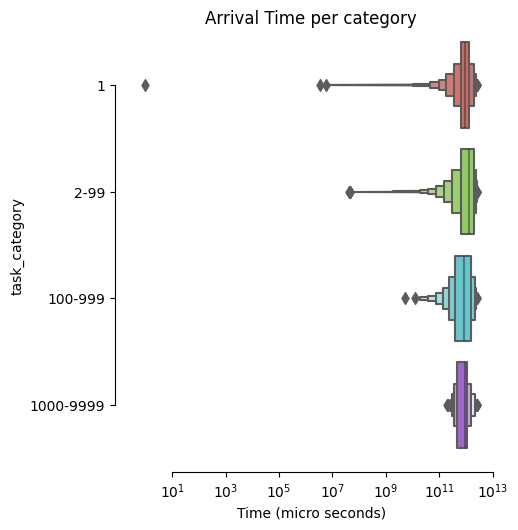

In [ ]:
sns.catplot(summary.to_pandas(),
            x="Arrival_Time",
            y="task_category",
            k_depth="trustworthy",
            kind="boxen",
            hue_order=hue_order,
            palette=palette).set(title="Arrival Time per category",
                                 xlabel="Time (micro seconds)",
                                 xscale="log")
sns.despine(trim=True, offset=10)
plt.show()

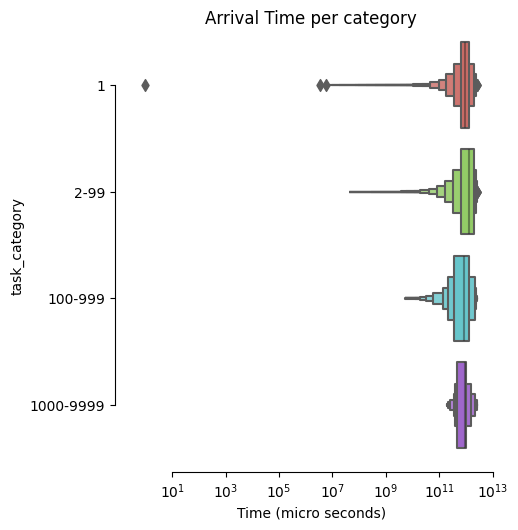

In [ ]:
sns.catplot(all_tasks.to_pandas(),
            x="Arrival_Time",
            y="task_category",
            k_depth="trustworthy",
            kind="boxen",
            hue_order=hue_order,
            palette=palette).set(title="Arrival Time per category",
                                 xlabel="Time (micro seconds)",
                                 xscale="log")
sns.despine(trim=True, offset=10)
plt.show()

In [ ]:
delta_mean = summary.select(pl.col("Delta_time")).mean().item()
delta_std = summary.select(pl.col("Delta_time")).std().item()

print(f"The average interval between arrivals is {delta_mean/1000} seconds with a CI of {((delta_mean - 2*delta_std/math.sqrt(len(summary)))/1000, (delta_mean + 2*delta_std/math.sqrt(len(summary)))/1000)}") 

The average interval between arrivals is 2322.080185269475 seconds with a CI of (2313.8870448880625, 2330.2733256508877)


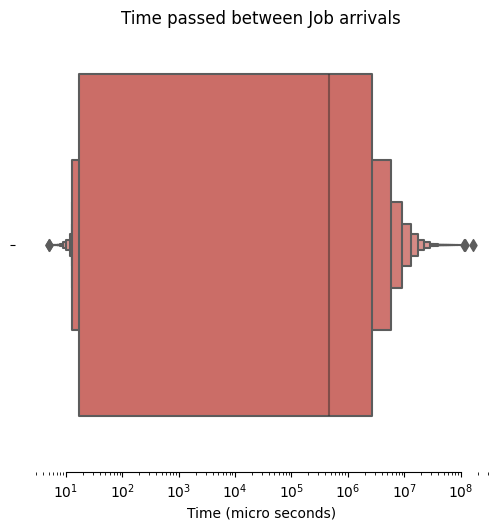

In [ ]:
sns.catplot(summary.to_pandas(),
            x="Delta_time",
            k_depth="trustworthy",
            kind="boxen",
            palette=palette).set(title="Time passed between Job arrivals",
                                 xlabel="Time (micro seconds)",
                                 xscale="log")
sns.despine(trim=True, offset=10)
plt.show()

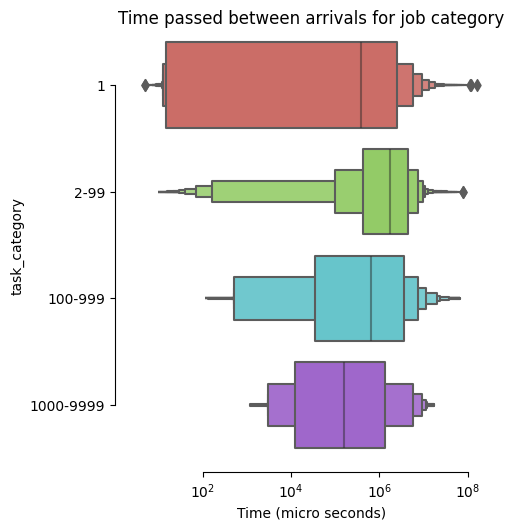

In [ ]:
sns.catplot(all_tasks.to_pandas(),
            x="Delta_time",
            y="task_category",
            k_depth="trustworthy",
            kind="boxen",
            hue_order=hue_order,
            palette=palette).set(title="Time passed between arrivals for job category",
                                 xlabel="Time (micro seconds)",
                                 xscale="log")
sns.despine(trim=True, offset=10)
plt.show()

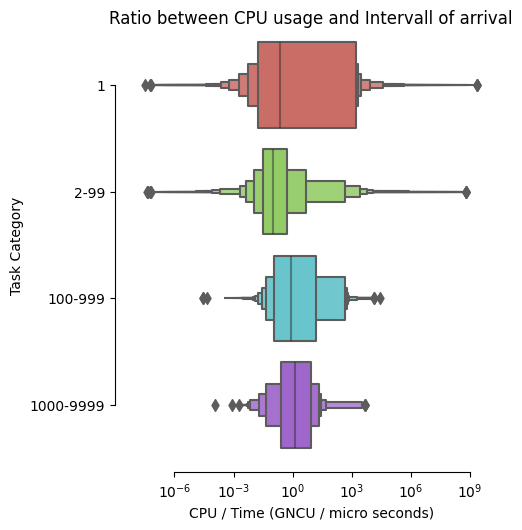

In [ ]:
sns.catplot(all_tasks.to_pandas(),
            x="Ratio_CPU_Delta_time",
            y="task_category",
            k_depth="trustworthy",
            kind="boxen",
            hue_order=hue_order,
            palette=palette).set(title="Ratio between CPU usage and Intervall of arrival",
                                 xlabel="CPU / Time (GNCU / micro seconds)",
                                 ylabel="Task Category",
                                 xscale="log")
sns.despine(trim=True, offset=10)
plt.show()

#### Number of tasks

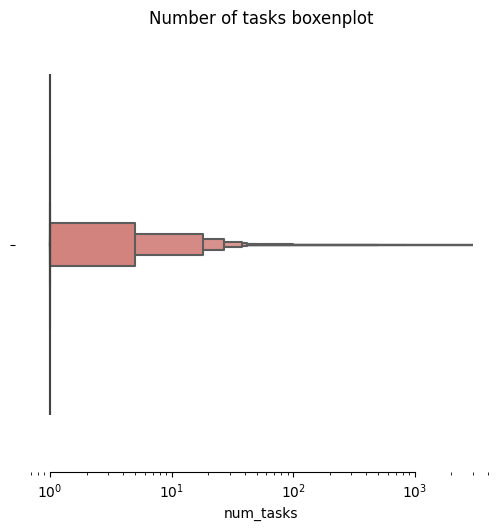

In [ ]:
sns.catplot(summary.to_pandas(),
            x="num_tasks",
            k_depth="trustworthy",
            kind="boxen",
            palette=palette).set(title="Number of tasks boxenplot", xscale="log")
sns.despine(trim=True, offset=10)
plt.show()

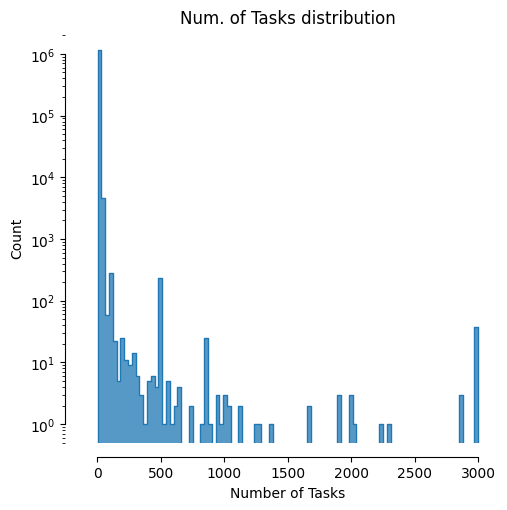

In [ ]:
sns.displot(summary.to_pandas(),
            x="num_tasks",
            bins=100,
            element="step").set(title="Num. of Tasks distribution",
                                xlabel="Number of Tasks",
                                yscale="log")
sns.despine(trim=True, offset=10)
plt.show()

##### Count of task categories

Importante!

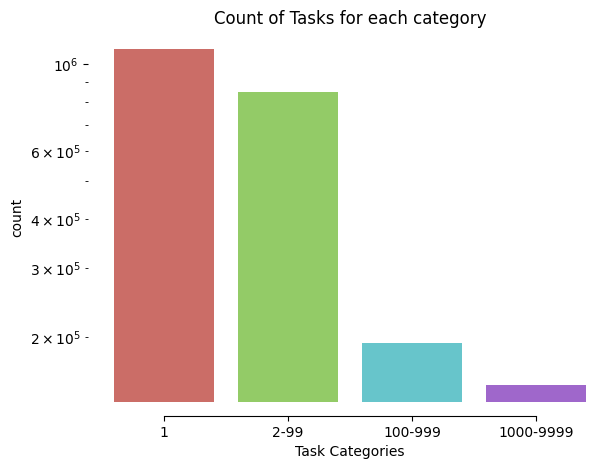

In [ ]:
sns.countplot(all_tasks.to_pandas(),
              x="task_category",
              hue_order=hue_order,
              palette=palette).set(title="Count of Tasks for each category",
                                   xlabel="Task Categories",
                                   yscale="log")
sns.despine(trim=True, offset=10)
plt.show()

#### Memory usage mean

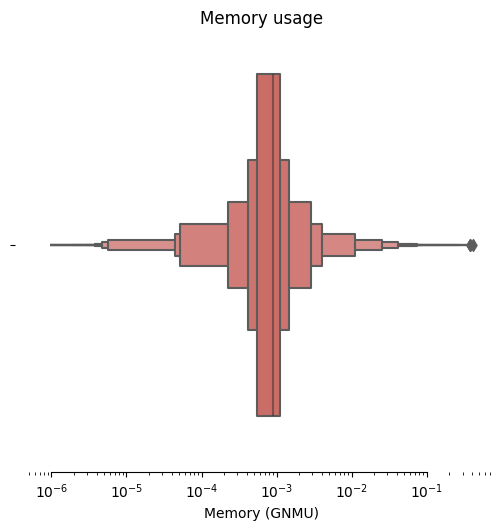

In [ ]:
sns.catplot(all_tasks.to_pandas(),
            x="Memory",
            k_depth="trustworthy",
            kind="boxen",
            palette=palette).set(title="Memory usage",
                                 xscale="log",
                                 xlabel="Memory (GNMU)")
sns.despine(trim=True, offset=10)
plt.show()

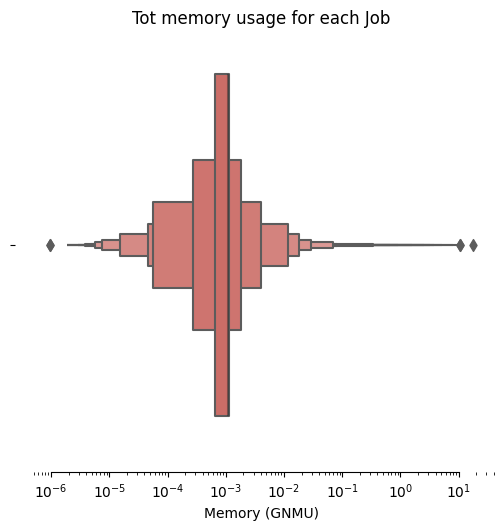

In [ ]:
sns.catplot(summary.to_pandas(),
            x="Memory_tot",
            k_depth="trustworthy",
            kind="boxen",
            palette=palette).set(title="Tot memory usage for each Job",
                                 xscale="log",
                                 xlabel="Memory (GNMU)")
sns.despine(trim=True, offset=10)
plt.show()

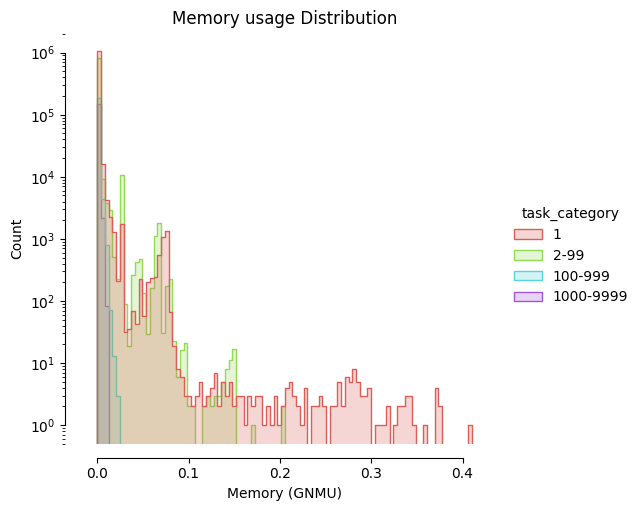

In [ ]:
sns.displot(all_tasks.to_pandas(),
            x="Memory",
            hue="task_category",
            palette=palette,
            element="step",
            bins=100).set(title="Memory usage Distribution",
                          xlabel="Memory (GNMU)",
                          yscale="log")
sns.despine(trim=True, offset=10)
plt.show()

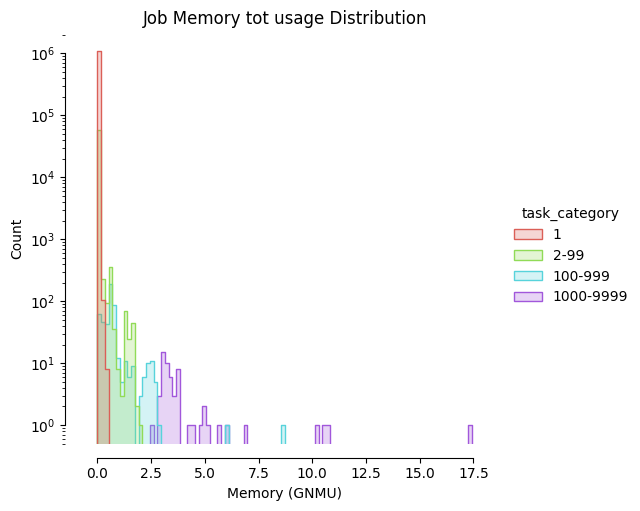

In [ ]:
sns.displot(summary.to_pandas(),
            x="Memory_tot",
            hue="task_category",
            palette=palette,
            element="step",
            bins=100).set(title="Job Memory tot usage Distribution",
                          xlabel="Memory (GNMU)",
                          yscale="log")
sns.despine(trim=True, offset=10)
plt.show()

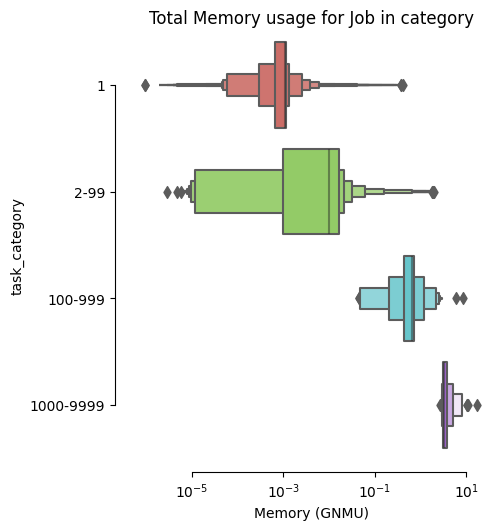

In [ ]:
sns.catplot(data=summary.to_pandas(),
            x="Memory_tot",
            y="task_category",
            kind="boxen",
            k_depth="trustworthy",
            hue_order=hue_order,
            palette=palette).set(title="Total Memory usage for Job in category",
                                 xlabel="Memory (GNMU)",
                                 xscale="log")
sns.despine(trim=True, offset=10)
plt.show()

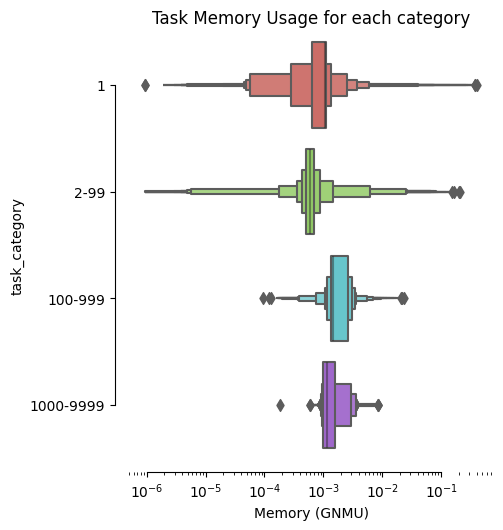

In [ ]:
sns.catplot(all_tasks.to_pandas(),
            x="Memory",
            y="task_category",
            k_depth="trustworthy",
            kind="boxen",
            hue_order=hue_order,
            palette=palette).set(title="Task Memory Usage for each category",
                                 xlabel="Memory (GNMU)",
                                 xscale="log")
sns.despine(trim=True, offset=10)
plt.show()

#### CPU usage

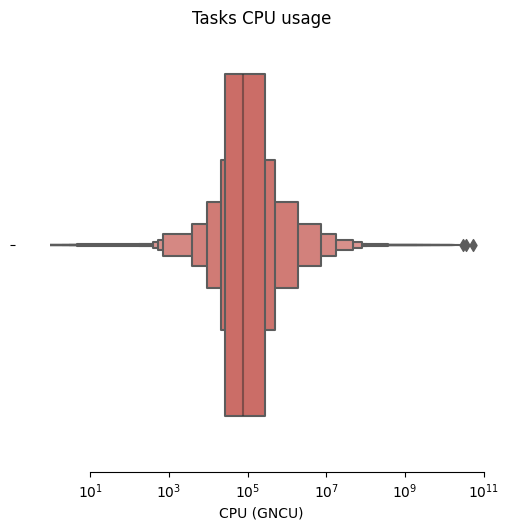

In [ ]:
sns.catplot(all_tasks.to_pandas(),
            x="CPU",
            k_depth="trustworthy",
            kind="boxen",
            palette=palette).set(title="Tasks CPU usage",
                                 xlabel="CPU (GNCU)",
                                 xscale="log")
sns.despine(trim=True, offset=10)
plt.show()

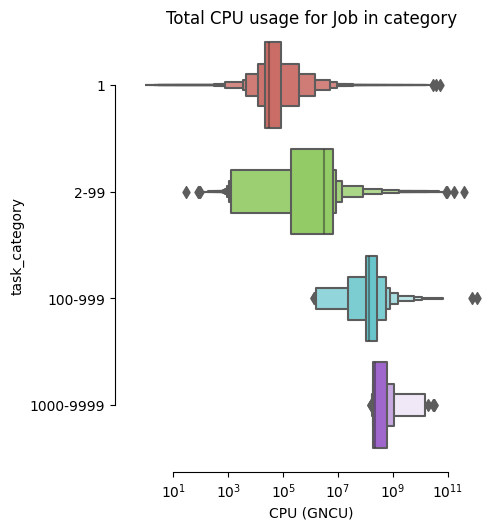

In [ ]:
sns.catplot(data=summary.to_pandas(),
            x="CPU_tot",
            y="task_category",
            k_depth="trustworthy",
            kind="boxen",
            hue_order=hue_order,
            palette=palette).set(title="Total CPU usage for Job in category",
                                 xlabel="CPU (GNCU)",
                                 xscale="log")
sns.despine(trim=True, offset=10)

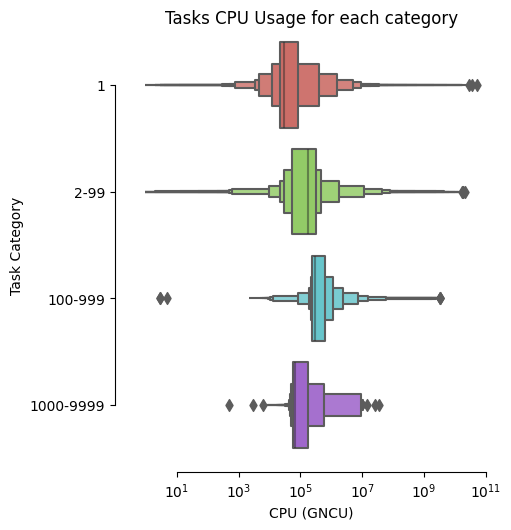

In [ ]:
sns.catplot(data=all_tasks.to_pandas(),
            x="CPU",
            y="task_category",
            k_depth="trustworthy",
            kind="boxen",
            hue_order=hue_order,
            palette=palette).set(title="Tasks CPU Usage for each category",
                                 xlabel="CPU (GNCU)",
                                 ylabel="Task Category",
                                 xscale="log")
sns.despine(trim=True, offset=10)

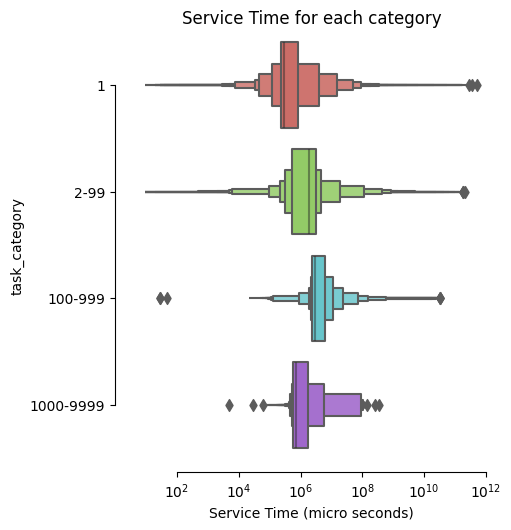

In [ ]:
sns.catplot(data=all_tasks.to_pandas(),
            x="Service_time",
            y="task_category",
            k_depth="trustworthy",
            kind="boxen",
            hue_order=hue_order,
            palette=palette).set(title="Service Time for each category",
                                 xlabel="Service Time (micro seconds)",
                                 xscale="log")
sns.despine(trim=True, offset=10)

In [ ]:
all_tasks.groupby(by="task_category").median()

task_category,Job_ID,Task_ID,CPU,Memory,Arrival_Time,Delta_time,num_tasks,CPU_tot,CPU_max,CPU_min,CPU_mean,CPU_std,Memory_tot,Memory_max,Memory_min,Memory_mean,Memory_std,Ratio_CPU_Delta_time,Service_time
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""1""",3.8271e11,0.0,29360.771179,0.001076,9.5951e11,384329.0,1.0,29360.771179,29360.771179,29360.771179,29360.771179,0.0,0.001076,0.001076,0.001076,0.001076,0.0,0.242796,293607.711792
"""1000-9999""",3.8239e11,1293.0,69405.555725,0.001144,8.8993e11,158083.0,2998.0,2.0514e8,389282.226562,34433.364868,69615.678043,20818.175874,3.322595,0.001427,0.00082,0.001151,0.000141,1.380325,694055.557251
"""2-99""",3.8411e11,10.0,182420.730591,0.000601,1.2956e12,1.749777e6,27.0,3.9778e6,277580.26123,133378.982544,196507.241991,39590.742091,0.014709,0.000668,0.000494,0.00059,0.000053,0.107173,1.8242e6
"""100-999""",3.8208e11,221.0,292368.888855,0.001444,8.3665e11,632892.0,498.0,1.4504e8,524942.398071,163810.72998,302255.230256,42518.484581,0.689043,0.001541,0.001091,0.001412,0.000131,0.839255,2.9237e6


In [ ]:
all_tasks.groupby(by="task_category").agg(pl.col("Service_time").median()).get_column("Service_time").mean()

1433889.8658752437

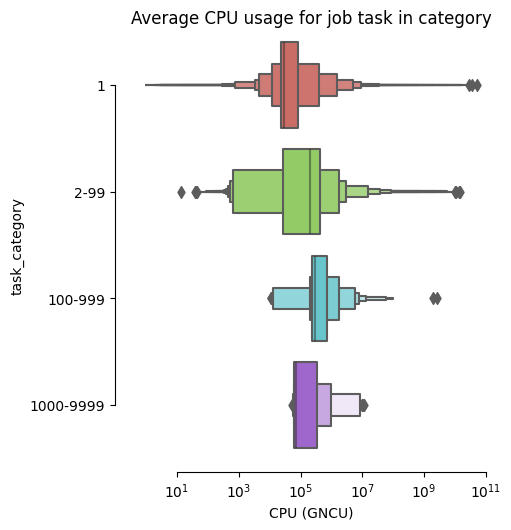

In [ ]:
sns.catplot(data=summary.to_pandas(),
            x="CPU_mean",
            y="task_category",
            k_depth="trustworthy",
            kind="boxen",
            hue_order=hue_order,
            palette=palette).set(title="Average CPU usage for job task in category",
                                 xlabel="CPU (GNCU)",
                                 xscale="log")
sns.despine(trim=True, offset=10)

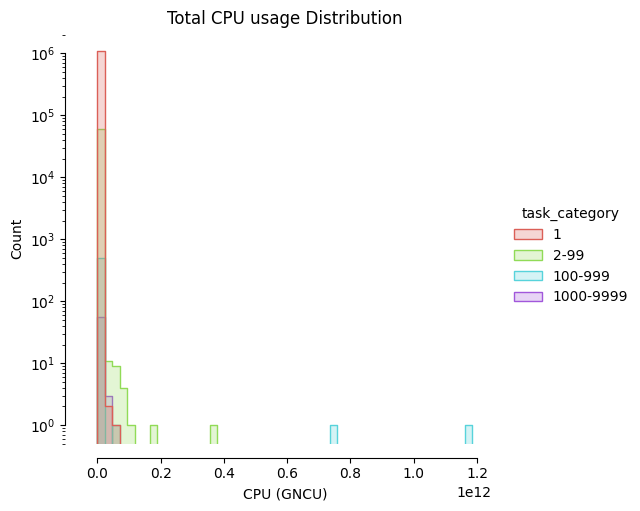

In [ ]:
sns.displot(summary.to_pandas(),
            x="CPU_tot",
            hue="task_category",
            palette=palette,
            element="step",
            bins=50).set(title="Total CPU usage Distribution",
                          xlabel="CPU (GNCU)",
                          yscale="log")
sns.despine(trim=True, offset=10)
plt.show()

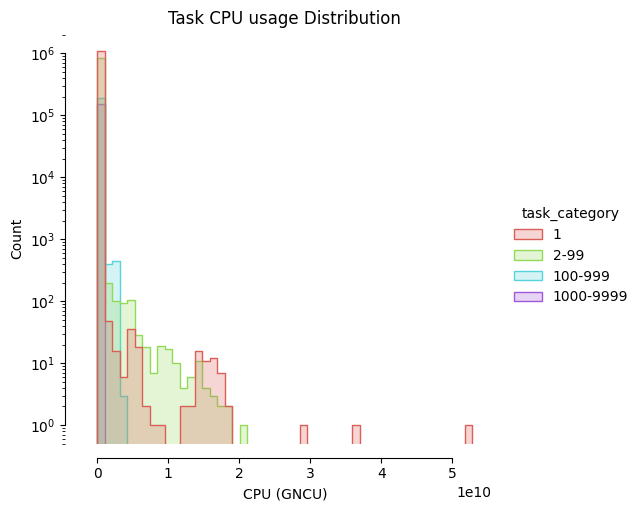

In [ ]:
sns.displot(all_tasks.to_pandas(),
            x="CPU",
            hue="task_category",
            palette=palette,
            element="step",
            bins=50).set(title="Task CPU usage Distribution",
                          xlabel="CPU (GNCU)",
                          yscale="log")
sns.despine(trim=True, offset=10)
plt.show()

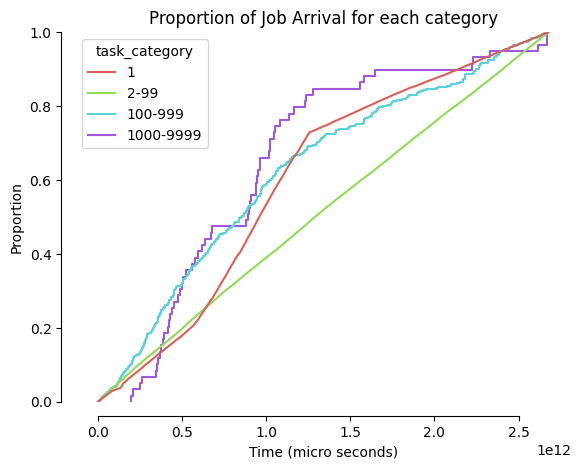

In [ ]:
sns.ecdfplot(data=summary.to_pandas(),
             x="Arrival_Time",
             hue="task_category",
             hue_order=hue_order,
             palette=palette).set(title="Proportion of Job Arrival for each category",
                                  xlabel="Time (micro seconds)")
sns.despine(trim=True, offset=10)
plt.show()

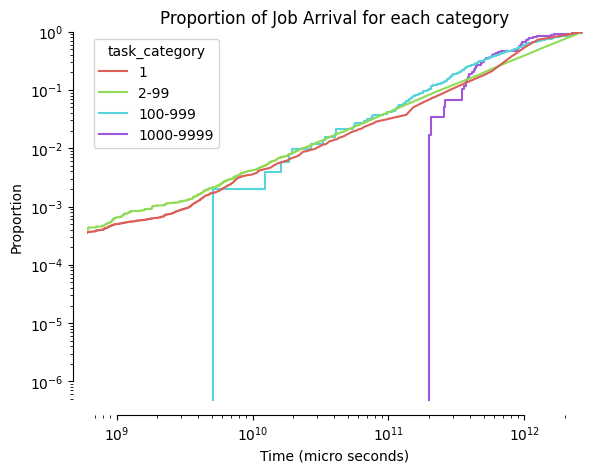

In [ ]:
sns.ecdfplot(data=summary.to_pandas(),
             x="Arrival_Time",
             hue="task_category",
             hue_order=hue_order,
             palette=palette).set(title="Proportion of Job Arrival for each category",
                                  xlabel="Time (micro seconds)",
                                  xlim=(603026300, 2678968860401),
                                  xscale="log",
                                  yscale="log")
sns.despine(trim=True, offset=10)
plt.show()

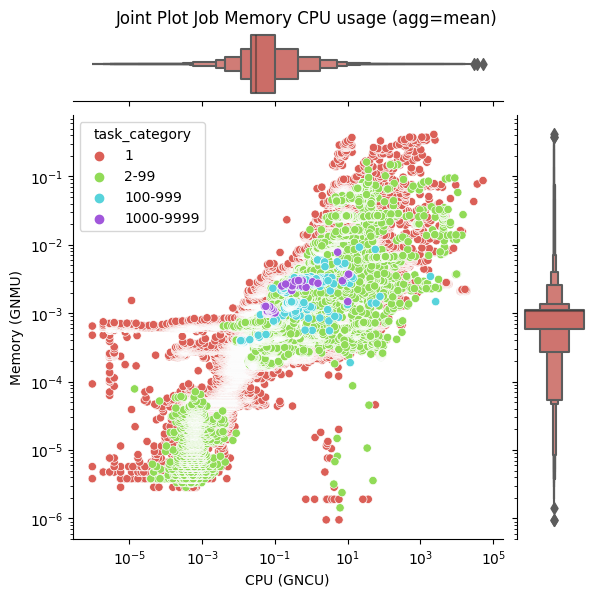

In [ ]:
g = sns.JointGrid(data=summary.to_pandas(),
                  x="CPU_mean",
                  y="Memory_mean",
                  hue="task_category",
                  hue_order=hue_order,
                  palette=palette)
g.fig.suptitle("Joint Plot Job Memory CPU usage (agg=mean)")
g.fig.subplots_adjust(top=0.95)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.boxenplot, k_depth="trustworthy")

g.ax_joint.set_xlabel("CPU (GNCU)")
g.ax_joint.set_ylabel("Memory (GNMU)")

g.ax_joint.set_xscale("log")
g.ax_joint.set_yscale("log")

plt.show()

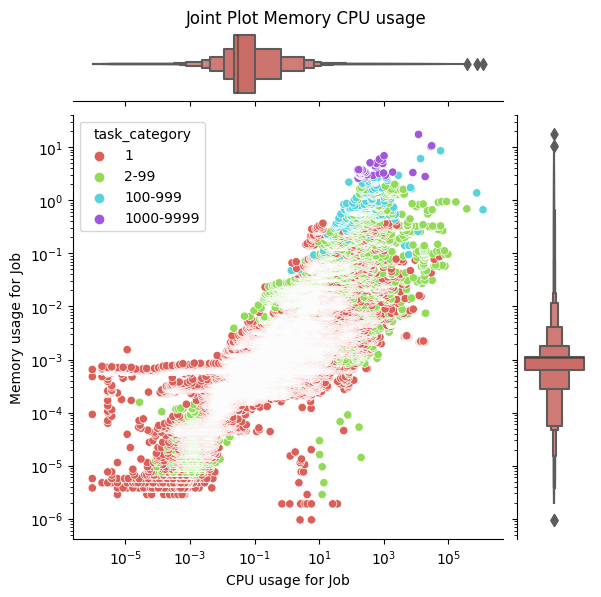

In [ ]:
g = sns.JointGrid(data=summary.to_pandas(),
                  x="CPU_tot",
                  y="Memory_tot",
                  hue="task_category",
                  hue_order=hue_order,
                  palette=palette)
g.fig.suptitle("Joint Plot Memory CPU usage")
g.fig.subplots_adjust(top=0.95)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.boxenplot, k_depth="trustworthy")

g.ax_joint.set_xlabel("CPU usage for Job")
g.ax_joint.set_ylabel("Memory usage for Job")

g.ax_joint.set_xscale("log")
g.ax_joint.set_yscale("log")

plt.show()

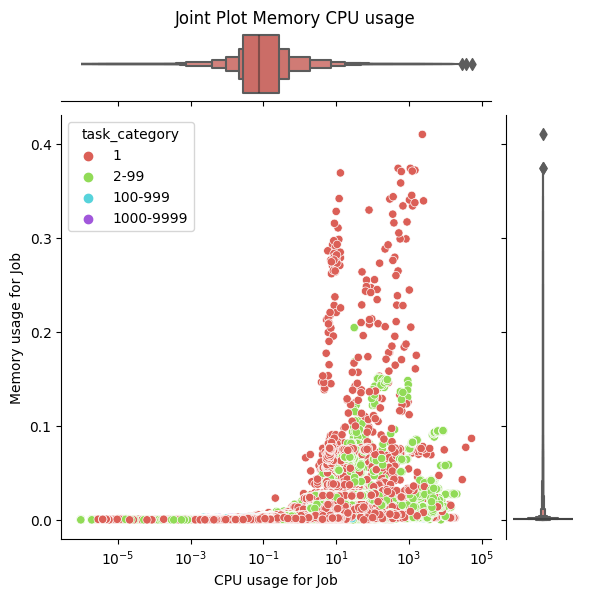

In [ ]:
g = sns.JointGrid(data=all_tasks.to_pandas(),
                  x="CPU",
                  y="Memory",
                  hue="task_category",
                  hue_order=hue_order,
                  palette=palette)
g.fig.suptitle("Joint Plot Memory CPU usage")
g.fig.subplots_adjust(top=0.95)
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.boxenplot, k_depth="trustworthy")

g.ax_joint.set_xlabel("CPU usage for Job")
g.ax_joint.set_ylabel("Memory usage for Job")

g.ax_joint.set_xscale("log")

plt.show()

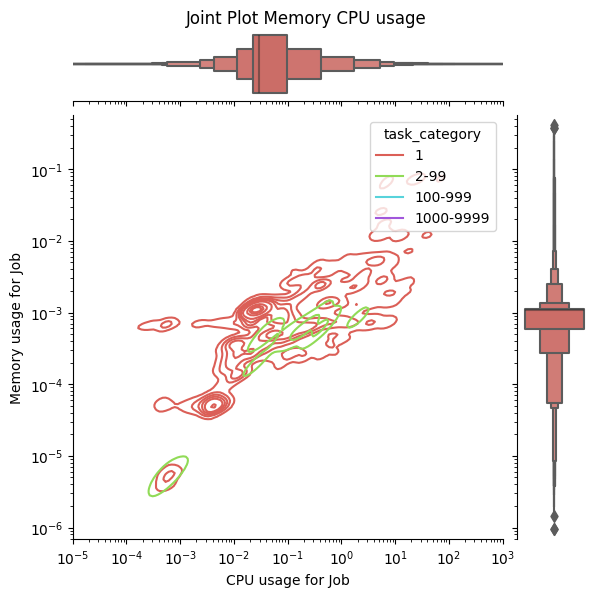

In [ ]:
g = sns.JointGrid(data=summary.to_pandas(),
                  x="CPU_mean",
                  y="Memory_mean",
                  hue="task_category",
                  hue_order=hue_order,
                  palette=palette)
g.fig.suptitle("Joint Plot Memory CPU usage")
g.fig.subplots_adjust(top=0.95)
g.plot_joint(sns.kdeplot, log_scale=(True, True))
g.plot_marginals(sns.boxenplot, k_depth="trustworthy")

g.ax_joint.set_xlabel("CPU usage for Job")
g.ax_joint.set_ylabel("Memory usage for Job")

#g.ax_joint.set_xscale("log")
g.ax_joint.set_xlim(1e-5, 1e3)

plt.show()

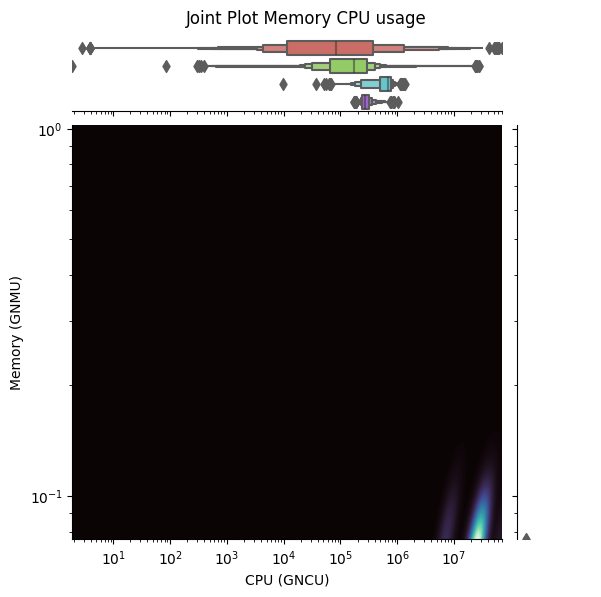

In [ ]:
g = sns.JointGrid(data=all_tasks.to_pandas()[-10000:],
                  x="CPU",
                  y="Memory",
                  # hue="task_category",
                  hue_order=hue_order,
                  palette=palette)
g.plot_joint(sns.kdeplot, fill=True, thresh=0, levels=100, cut=0, cmap="mako", log_scale=(True, True))
sns.boxenplot(data=all_tasks.to_pandas(), x="task_category", y=g.y, ax=g.ax_marg_y, palette=palette)
sns.boxenplot(data=all_tasks.to_pandas(), y="task_category", x=g.x, ax=g.ax_marg_x, palette=palette)

g.ax_joint.set_xscale("log")
g.ax_joint.set_yscale("log")

g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("Joint Plot Memory CPU usage")
g.ax_joint.set_xlabel("CPU (GNCU)")
g.ax_joint.set_ylabel("Memory (GNMU)")

#sns.move_legend(g.ax_joint, "upper left")
plt.show()

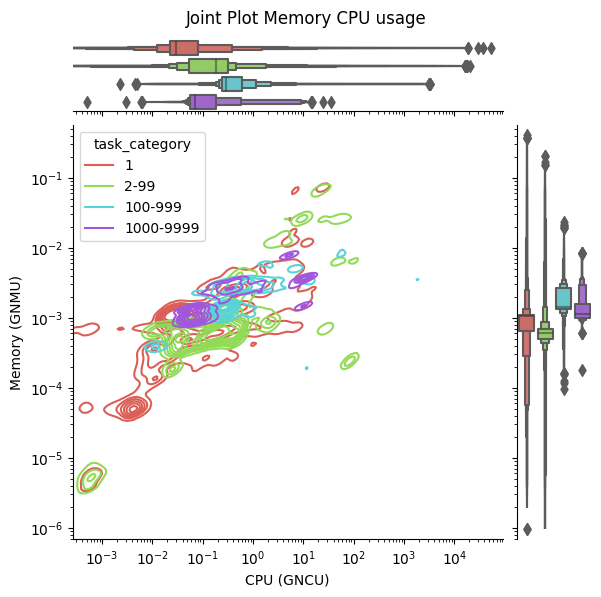

In [ ]:
g = sns.JointGrid(data=all_tasks.to_pandas(),
                  x="CPU",
                  y="Memory",
                  hue="task_category",
                  hue_order=hue_order,
                  palette=palette)
g.plot_joint(sns.kdeplot, log_scale=(True, True))
sns.boxenplot(data=summary.to_pandas(), x=g.hue, y=g.y, ax=g.ax_marg_y, palette=palette)
sns.boxenplot(data=summary.to_pandas(), y=g.hue, x=g.x, ax=g.ax_marg_x, palette=palette)

g.ax_joint.set_xscale("log")
g.ax_joint.set_yscale("log")

g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("Joint Plot Memory CPU usage")
g.ax_joint.set_xlabel("CPU (GNCU)")
g.ax_joint.set_ylabel("Memory (GNMU)")

sns.move_legend(g.ax_joint, "upper left")

In [ ]:
all_tasks.select(pl.col("Memory"),
                 pl.col("CPU")).with_columns(CPU_log = pl.col("CPU").apply(math.log),
                                             Memory_log = pl.col("Memory").apply(math.log)).corr()

Memory,CPU,CPU_log,Memory_log
f64,f64,f64,f64
1.0,0.08224,0.351067,0.465016
0.08224,1.0,0.138932,0.052013
0.351067,0.138932,1.0,0.633452
0.465016,0.052013,0.633452,1.0


In [ ]:
g = sns.JointGrid(data=all_tasks.to_pandas(),
                  x="CPU",
                  y="Memory",
                  hue="task_category",
                  hue_order=hue_order,
                  palette=palette)
g.plot_joint(sns.hexplot)#, log_scale=(True, True))
sns.boxenplot(data=summary.to_pandas(), x=g.hue, y=g.y, ax=g.ax_marg_y, palette=palette)
sns.boxenplot(data=summary.to_pandas(), y=g.hue, x=g.x, ax=g.ax_marg_x, palette=palette)

g.ax_joint.set_xscale("log")
g.ax_joint.set_yscale("log")

g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("Joint Plot Memory CPU usage")
g.ax_joint.set_xlabel("CPU (GNCU)")
g.ax_joint.set_ylabel("Memory (GNMU)")

sns.move_legend(g.ax_joint, "upper left")

In [ ]:
sns.jointplot(data=all_tasks.to_pandas(), x="CPU", y="Memory", kind="hex")

In [ ]:
g = sns.JointGrid(data=all_tasks.to_pandas(),
                  x="CPU",
                  y="Memory",
                  hue="task_category",
                  hue_order=hue_order,
                  palette=palette)
g.fig.suptitle("Joint Plot Memory CPU usage")
g.fig.subplots_adjust(top=0.95)
g.plot_joint(sns.kdeplot, log_scale=(True, True))
g.plot_marginals(sns.boxenplot, k_depth="trustworthy")

g.ax_joint.set_xlabel("CPU usage for Job")
g.ax_joint.set_ylabel("Memory usage for Job")

#g.ax_joint.set_xscale("log")
#g.ax_joint.set_ylim(0, 0.10)

plt.show()

# Simulation

In [19]:
import shelve
from sortedcontainers import SortedDict
from collections import defaultdict
from tqdm.auto import tqdm
from joblib import Parallel, delayed

## Define the Controller Class

In [20]:
class Controller:
  def __init__(self):
    self.jobs = {}
    self.running_jobs = []
    self.number_running_jobs = 0
    self.number_terminated_jobs = 0

  def add(self,
          job_id: str,
          tasks: List[str],
          t: int) -> None:
    self.jobs[job_id] = {'arrived': t}
    self.jobs[job_id]['tasks'] = tasks
    self.number_running_jobs += 1
    return None

  def task_terminated(self,
                      id: tuple,
                      t: int) -> None:
    # Get the job_id and task_id from id
    job_id, task_id = id

    # Remove the terminated task
    self.jobs[job_id]['tasks'].remove(task_id)

    # If all task are terminated then terminate the job
    if not self.jobs[job_id]['tasks']:
      self.jobs[job_id]['terminated'] = t
      self.jobs[job_id]['response_time'] = t - self.jobs[job_id]['arrived']
      self.number_running_jobs -= 1
      self.number_terminated_jobs += 1
    return None

  def __str__(self):
    return f'Number of running jobs: {self.number_running_jobs}\nNumber of terminated jobs {self.number_terminated_jobs}'

## Define the Servers with the Schedulers

In [21]:
class Server:
  def __init__(self,
               id: int,
               controller: Controller,
               mu: float = 0.1,
               t: int = 0,
               max_memory: float = 1.0):
    self.id = id
    self.controller = controller

    self.time = t
    self.busy_time = 0

    self.mu = mu
    self.server_memory = max_memory

    self.tasks = []
    self.work = {}
    self.memory = {}
    self.times = {}

  def advance_time(self,
                   t) -> None:
    if self.tasks: self.run(t)
    self.time += t
    return None

  def add(self,
          task: tuple,
          cpu: float,
          memory: float) -> None:

      self.tasks.append(task)
      self.work[task] = cpu
      self.memory[task] = memory
      self.times[task] = self.time

      return None


  def unfinished(self) -> float:
    if not self.tasks:
      return 0
    
    return np.sum(np.array(list(self.work.values())) / mu)


  def status(self) -> dict:
    return {'tasks': self.tasks,
            'work': self.work,
            'server_memory': self.server_memory,
            'unfinished_work': self.unfinished(),
            'busy_time': self.busy_time}



  def run(self,
          t: int) -> None:
    """
    t is a relative time, the elapsed time
    """

    time = self.time

    while t > 0:

      task = self.scheduler()

      st = self.work[task] / self.mu
      self.work[task] -= t * self.mu

      if st >= t:
        self.busy_time += t
      else:
        self.busy_time += st

      # If task is terminated
      if self.work[task] <= 0:
        # Tell the controller the task is terminated
        self.controller.task_terminated(task, time+st)

        # Delete the task
        del self.work[task]
        del self.memory[task]
        self.tasks.remove(task)

      t -= st
      time += st

      if not self.tasks: break

    return None


  def scheduler(self) -> str:
    # Scheduler smallest work first
    return  self.tasks[0]

In [22]:
class Server_our(Server):
  def __init__(self,
               time_slot: float,
               id: int,
               controller: Controller,
               mu: float = 0.1,
               t: int = 0,
               max_memory: float = 1.0):
    super().__init__(id=id,
                     controller=controller,
                     mu=mu,
                     t=t,
                     max_memory=max_memory)
    self.time_slot = time_slot
    self.remain_time = time_slot
    self.current_task = None

    self.priority = SortedDict()


  def add(self,
          task: tuple,
          cpu: float,
          memory: float,
          priority: int) -> None:
    
      self.tasks.append(task)
      self.work[task] = cpu
      self.memory[task] = memory
      self.times[task] = self.time

      if self.priority.get(priority):
        self.priority[priority].append(task)
      else:
        self.priority[priority] = [task]

      return None


  def run(self,
          t: int) -> None:
    """
    t is a relative time, the elapsed time
    """

    time = self.time

    while t > 0:

      task, prio = self.scheduler()

      available_time = min(t, self.remain_time)

      service_time = self.work[task] / self.mu
      self.work[task] -= available_time * self.mu

      if service_time >= available_time:
        self.busy_time += available_time
        if t == available_time:
          self.remain_time -= t

          # There still slot time available for this task, we save it in the current_task
          self.current_task = (task, prio)

        else:
          self.remain_time = self.time_slot
          self.current_task = None

          # We age the tasks in queue
          prio = self.__aging(prio)

          # Task is not finished so we append it again to the corresponding prio list
          self.priority[prio].append(task)

      else:
        # Task has ended

        # Update values
        self.busy_time += service_time
        self.remain_time -= service_time

        # Tell the controller the task is terminated
        self.controller.task_terminated(task, time + service_time)

        # Delete the task
        del self.work[task]
        del self.memory[task]
        self.tasks.remove(task)

        # Reset current task
        self.current_task = None

        # Remove task from the priority queue
        if task in self.priority[prio]:
          self.priority[prio].remove(task)

        # If there are not tasks with that prio, we remove the prio
        if not self.priority[prio]:
          del self.priority[prio]
      
      working_time = min(service_time, available_time)

      t -= working_time
      time += working_time
  
      if not self.tasks: break

    return None


  def scheduler(self) -> tuple:
    if self.current_task:
      task, prio = self.current_task

      # If the arrived task has more priority we stop the current task and give the CPU to the new task
      if (best_prio := next(iter(self.priority.keys()))) < prio:
        self.priority[prio].append(task)
        self.remain_time = self.time_slot
        self.current_task = None

        prio = best_prio
        task = self.priority[prio].pop()

    else:
      prio = next(iter(self.priority.keys()))
      task = self.priority[prio].pop()
    return task, prio


  def __aging(self,
              prio_task: int) -> int:

    if prio_task != 1:
      prio_task -= 1

    priorities = iter(self.priority.keys())

    for prio in priorities:
      if prio != 1:
        prev_prio = prio - 1

        if not self.priority.get(prev_prio):
          self.priority[prev_prio] = self.priority[prio]
        else:
          self.priority[prev_prio] += self.priority[prio]

        del self.priority[prio]

    return prio_task

## Define the Dispatchers

In [23]:
def LWL_disp(dataframe: pl.DataFrame,
             t: int = 0,
             mu: float = 0.1) -> Tuple[Controller, List[Server], int]:
  """A function that implements the LWL dispatcher.

  Args:
    - dataframe (pl.DataFrame): The polars DataFrame containing the data population.
    - t (int): The initial absolute time. Default 0.
    - mu (float): The processing power of each server. Default 0.1.

  Returns:
    - (controller, servers, int) (Tuple[Controller, List[Server], int]): A tuple containing the controller,
                                                                         the list of the servers and the final
                                                                         value of the absolute time.
  """

  # Initialize the controller
  controller = Controller()

  # Initialize the servers
  servers =  [Server(id=i, controller=controller, t=t) for i in range(64)]


  for row in tqdm(dataframe.groupby(by="Job_ID", maintain_order=True).all().iter_rows(named=True), total=len(dataframe.get_column('Job_ID').unique())):

    # Get job info
    job = row['Job_ID']
    time = row['Delta_time'][0]
    tasks = row['Task_ID']
    cpu = row['CPU']
    memory = row['Memory']

    # Create an unique id for each task
    uniqueid_tasks = [(job, task) for task in tasks]

    # Update time
    t += time

    # Add the job to the controller
    controller.add(job, tasks, t)
    
    # Advance the time to all servers
    for server in servers:
      server.advance_time(time)

    # Dispatch the tasks
    for i, task in enumerate(uniqueid_tasks):
      statuses = np.array([server.status()['unfinished_work'] for server in servers])
      minimum = np.random.choice(np.where(statuses == statuses.min())[0])
      servers[minimum].add(task,
                           cpu[i],
                           memory[i])
      
  return controller, servers, t

In [24]:
def our_disp(dataframe: pl.DataFrame,
             time_slot: float,
             t: int = 0,
             mu: float = 0.1) -> Tuple[Controller, List[Server], int]:
  """A function that implements the our dispatcher.

  Args:
    - dataframe (pl.DataFrame): The polars DataFrame containing the data population.
    - time_slot (float): The slot of CPU time to allocate for each task. 
    - t (int): The initial absolute time. Default 0.
    - mu (float): The processing power of each server. Default 0.1.

  Returns:
    - (controller, servers, int) (Tuple[Controller, List[Server], int]): A tuple containing the controller,
                                                                         the list of the servers and the final
                                                                         value of the absolute time.
  """

  # Initialize the controller
  controller = Controller()

  # Initialize the Servers
  servers =  [Server_our(id=i, controller=controller, t=t, time_slot=time_slot) for i in range(64)]


  for row in tqdm(dataframe.groupby(by="Job_ID", maintain_order=True).all().iter_rows(named=True), total=len(dataframe.get_column('Job_ID').unique())):

    # Get job info
    job = row['Job_ID']
    time = row['Delta_time'][0] 

    jb = pl.DataFrame({"Task_ID": row['Task_ID'],
                       "CPU": row['CPU'],
                       "Memory": row['Memory']}).sort(by="CPU")
 
    tasks = jb.get_column("Task_ID").to_list()
    cpu = jb.get_column("CPU").to_list()
    memory = jb.get_column("Memory").to_list()

    n_tasks = len(tasks)

    # Create an unique id for each task
    uniqueid_tasks = [(job, task) for task in tasks]

    # Update time
    t += time

    # Add the job to the controller
    controller.add(job, tasks, t)
    
    # Advance the time to all servers
    for server in servers:
      server.advance_time(time)

    # Dispatch the tasks
    statuses = np.array([server.status()['unfinished_work'] for server in servers])

    for i, task in enumerate(uniqueid_tasks):
      minimum = np.random.choice(np.where(statuses == statuses.min())[0])
      statuses[minimum] += cpu[i] / mu
      servers[minimum].add(task,
                          cpu[i],
                          memory[i],
                          priority=n_tasks)

  return controller, servers, t

## Running the simulations

In [ ]:
df = all_tasks.sort(by="Arrival_Time").select(pl.col("Job_ID"),
                                              pl.col("Task_ID"),
                                              pl.col("Arrival_Time"),
                                              pl.col("Delta_time"),
                                              pl.col("CPU"),
                                              pl.col("Memory")).with_columns(pl.col("Job_ID").cast(str),
                                                                             pl.col("Task_ID").cast(str))

In [ ]:
controller_bs, servers_bs, time_bs = LWL_disp(dataframe=df)

In [25]:
mu = 0.1
time_slot = all_tasks.filter(pl.col("task_category") == "1").get_column("CPU").median() / mu

In [ ]:
controller_ours, servers_ours, time_ours = our_disp(dataframe=df,
                                                    time_slot=time_slot)

We can save the files using the `shelve` library like so:



```python
with shelve.open("baseline") as db:
  db['controller'] = controller
  db['servers'] = servers
  db['time'] = time
```



In [26]:
!unzip baseline.zip

Archive:  baseline.zip
  inflating: baseline.db             


In [41]:
!unzip ours_aging.zip

Archive:  ours_aging.zip
  inflating: ours_aging.db           


In [ ]:
with shelve.open("baseline") as db:
  controller_bs = db['controller']
  servers_bs = db['servers']
  time_bs = db['time']

In [ ]:
with shelve.open("ours_aging") as db:
  controller_ours = db['controller']
  servers_ours = db['servers']
  time_ours = db['time']

## Analyzing the results

### Needed functions

In [29]:
def server_utilization(servers: List[Server],
                       t: int) -> pl.DataFrame:
  """A function that returns the dataframe with the servers utilization ratio.

  Args:
    - servers (List[Server]): The list containing the servers.
    - t (int): The overall time.

  Returns:
    - pl.DataFrame : The polars DataFrame of the servers utilization ratio.
  """
  def name_generator() -> str:
    """A name generator for the plDataFrame column name.

    Returns:
      - str : The column name of the following format "Server_i", where i is the index of the server.
    """  
    base_name = "Server_"
    count = 0
    while True:
      yield f"{base_name}{count}"
      count += 1

  servers_usage = [server.busy_time / t for server in servers]
  return pl.DataFrame({'Server_ID': list(range(len(servers))),
                       'Server_Usage': servers_usage})#.transpose(include_header=False, column_names=name_generator())

 

In [30]:
def jobs_info(controller: Controller) -> pl.DataFrame:
  """A function that returns the pl.DataFrame containing the Response Time for each Job

  Args:
    - controller (Controller): The controller object that has in memory the infos.

  Returns:
    - pl.DataFrame : The polars DataFrame with the Response Time for each job.
  """
  jobs = [int(job) for job in controller.jobs]
  jobs_response_time = [controller.jobs[job].get('response_time') for job in controller.jobs]
  return pl.DataFrame({"Job_ID": jobs, "Response_Time": jobs_response_time})

### Data frames

In [136]:
utilization_coefficient_bs = server_utilization(servers_bs, time_bs).with_columns(Model = pl.lit('Baseline'))

display(utilization_coefficient_bs)

Server_ID,Server_Usage,Model
i64,f64,str
0,0.59382,"""Baseline"""
1,0.567103,"""Baseline"""
2,0.497597,"""Baseline"""
3,0.498519,"""Baseline"""
4,0.531538,"""Baseline"""
5,0.560633,"""Baseline"""
6,0.515488,"""Baseline"""
7,0.515983,"""Baseline"""
8,0.577842,"""Baseline"""


In [137]:
utilization_coefficient_ours = server_utilization(servers_ours, time_ours).with_columns(Model = pl.lit('Ours'))

display(utilization_coefficient_ours)

Server_ID,Server_Usage,Model
i64,f64,str
0,0.530322,"""Ours"""
1,0.513634,"""Ours"""
2,0.508389,"""Ours"""
3,0.55537,"""Ours"""
4,0.526751,"""Ours"""
5,0.579818,"""Ours"""
6,0.503888,"""Ours"""
7,0.495734,"""Ours"""
8,0.509235,"""Ours"""


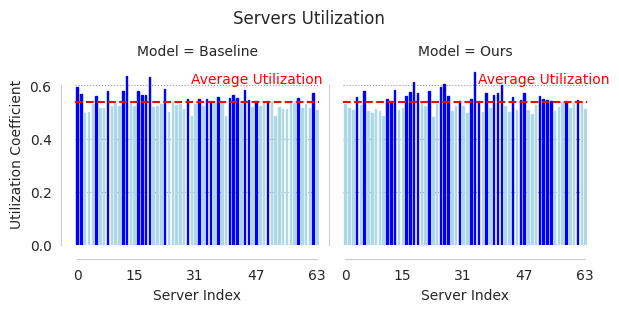

In [138]:
server_usage = pl.concat([utilization_coefficient_bs, utilization_coefficient_ours], how="vertical")

mean_usage_bs = server_usage.filter(pl.col("Model")=="Baseline").get_column("Server_Usage").mean()
mean_usage_ours = server_usage.filter(pl.col("Model")=="Ours").get_column("Server_Usage").mean()

g = sns.FacetGrid(server_usage.to_pandas(), col="Model")
g.map_dataframe(sns.barplot,
                x="Server_ID",
                y="Server_Usage",
                width=0.4)


ax1, ax2 = g.axes[0]

ax1.axhline(mean_usage_bs, ls='--', c="red")
ax2.axhline(mean_usage_ours, ls='--', c="red")

ax1.text(30, mean_usage_bs+0.07, "Average Utilization", c="red")
ax2.text(35, mean_usage_ours+0.07, "Average Utilization", c="red")

for bar in ax1.patches:
    if bar.get_height() > mean_usage_bs:
        bar.set_color('blue')
    else:
        bar.set_color('lightblue')

for bar in ax2.patches:
    if bar.get_height() > mean_usage_ours:
        bar.set_color('blue')
    else:
        bar.set_color('lightblue')

g.set(xlabel="Server Index", ylabel=r'Utilization Coefficient', xticks=[0, 15, 31, 47, 63])
g.fig.suptitle('Servers Utilization')
g.fig.subplots_adjust(top=0.80)
sns.despine(trim=True, offset=10)
plt.show()

In [146]:
service_time = data.groupby(by="Job_ID").agg(Service_Time = (pl.col("CPU").sum() / mu)/1e06)

job_info_bs = jobs_info(controller_bs).join(service_time, on="Job_ID").with_columns(Job_Slowdown = pl.col("Response_Time") / pl.col("Service_Time")).join(data.select(pl.col("Arrival_Time"),
                                                                                                                                                                pl.col("Job_ID")).unique(), on="Job_ID").sort(by="Arrival_Time")

job_info_bs = job_info_bs.with_columns(pl.col("Response_Time")/1e06,
                                       pl.col("Job_Slowdown")/1e06)

display(job_info_bs)

display(job_info_bs.select(Response_Time_mean = pl.col("Response_Time"),
                           Job_Slowdown_mean = pl.col("Job_Slowdown")).mean())

Job_ID,Response_Time,Service_Time,Job_Slowdown,Arrival_Time
i64,f64,f64,f64,i64
375000667413,0.41851,0.41851,1.0,603026300
375000669289,0.249681,0.249681,1.0,606413041
375000670586,0.241756,0.241756,1.0,608994453
375000670588,0.195522,0.195522,1.0,608994466
375000670590,0.280437,0.280437,1.0,609042903
375000670901,0.279102,0.279102,1.0,609794657
375000670926,0.303726,0.303726,1.0,609822664
375000670981,0.184736,0.184736,1.0,610235344
375000671303,0.250273,0.250273,1.0,610982397


Response_Time_mean,Job_Slowdown_mean
f64,f64
27602.903798,1.2416e6


In [148]:
service_time = data.groupby(by="Job_ID").agg(Service_Time = (pl.col("CPU").sum() / mu)/1e06)

job_info_ours = jobs_info(controller_ours).join(service_time, on="Job_ID").with_columns(Job_Slowdown = pl.col("Response_Time") / pl.col("Service_Time")).join(data.select(pl.col("Arrival_Time"),
                                                                                                                                                                pl.col("Job_ID")).unique(), on="Job_ID").sort(by="Arrival_Time")

job_info_ours = job_info_ours.with_columns(pl.col("Response_Time")/1e06,
                                           pl.col("Job_Slowdown")/1e06)

display(job_info_ours)

display(job_info_ours.select(Response_Time_mean = pl.col("Response_Time"),
                           Job_Slowdown_mean = pl.col("Job_Slowdown")).mean())

Job_ID,Response_Time,Service_Time,Job_Slowdown,Arrival_Time
i64,f64,f64,f64,i64
375000667413,0.41851,0.41851,1.0,603026300
375000669289,0.249681,0.249681,1.0,606413041
375000670586,0.241756,0.241756,1.0,608994453
375000670588,0.195522,0.195522,1.0,608994466
375000670590,0.280437,0.280437,1.0,609042903
375000670901,0.279102,0.279102,1.0,609794657
375000670926,0.303726,0.303726,1.0,609822664
375000670981,0.184736,0.184736,1.0,610235344
375000671303,0.250273,0.250273,1.0,610982397


Response_Time_mean,Job_Slowdown_mean
f64,f64
7224.569604,444313.575264


In [128]:
message_load_bs = all_tasks.with_columns(Message_for_task = 128+1).get_column("Message_for_task").mean()

In [130]:
message_load_ours = summary.with_columns(Message_for_task = 128+pl.col("num_tasks")).get_column("Message_for_task").sum() / len(all_tasks)

In [131]:
table_bs = job_info_bs.select(pl.col("Response_Time").alias("Response Time Mean"),
                              pl.col("Job_Slowdown").alias("Job Slowdown Mean")).mean().with_columns(pl.lit(mean_usage_bs).alias("Utilization Coefficient of server"),
                                                                                                     pl.lit(message_load_bs).alias("The mean message load"),
                                                                                                     pl.lit("Baseline").alias("Model"))

In [132]:
table_ours = job_info_ours.select(pl.col("Response_Time").alias("Response Time Mean"),
                                  pl.col("Job_Slowdown").alias("Job Slowdown Mean")).mean().with_columns(pl.lit(mean_usage_ours).alias("Utilization Coefficient of server"),
                                                                                                         pl.lit(message_load_ours).alias("The mean message load"),
                                                                                                         pl.lit("Ours").alias("Model"))

In [133]:
pl.concat([table_bs, table_ours], how="vertical").select(pl.col("Model"),
                                                         pl.col("Response Time Mean"),
                                                         pl.col("Job Slowdown Mean"),
                                                         pl.col("Utilization Coefficient of server"),
                                                         pl.col("The mean message load")).write_csv("table.csv")

### Plots

In [149]:
resp_time_job_slwdwn = pl.concat([job_info_bs.with_columns(Model = pl.lit('Baseline')), job_info_ours.with_columns(Model = pl.lit('Ours'))], how="vertical")
display(resp_time_job_slwdwn)

Job_ID,Response_Time,Service_Time,Job_Slowdown,Arrival_Time,Model
i64,f64,f64,f64,i64,str
375000667413,0.41851,0.41851,1.0,603026300,"""Baseline"""
375000669289,0.249681,0.249681,1.0,606413041,"""Baseline"""
375000670586,0.241756,0.241756,1.0,608994453,"""Baseline"""
375000670588,0.195522,0.195522,1.0,608994466,"""Baseline"""
375000670590,0.280437,0.280437,1.0,609042903,"""Baseline"""
375000670901,0.279102,0.279102,1.0,609794657,"""Baseline"""
375000670926,0.303726,0.303726,1.0,609822664,"""Baseline"""
375000670981,0.184736,0.184736,1.0,610235344,"""Baseline"""
375000671303,0.250273,0.250273,1.0,610982397,"""Baseline"""


In [ ]:
import matplotlib.ticker as mticker

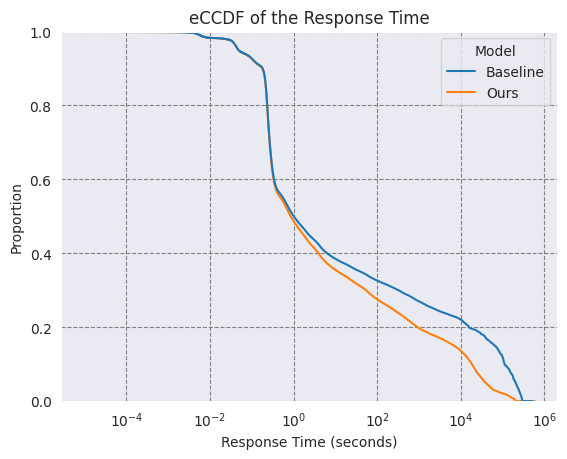

In [ ]:
g = sns.ecdfplot(data=resp_time_job_slwdwn.to_pandas(),
                 x="Response_Time",
                 hue="Model",
                 complementary=True)

# Set attributes
g.set(title="eCCDF of the Response Time",
      xscale="log",
      xlabel="Response Time (seconds)")

# Grid and locators
plt.grid(True, which="both", ls="--", c='gray')

locmin = mticker.LogLocator(base=10, subs=np.arange(0.1, 1, 0.1), numticks=10)
g.xaxis.set_minor_locator(locmin)
g.xaxis.set_minor_formatter(mticker.NullFormatter())

plt.show()


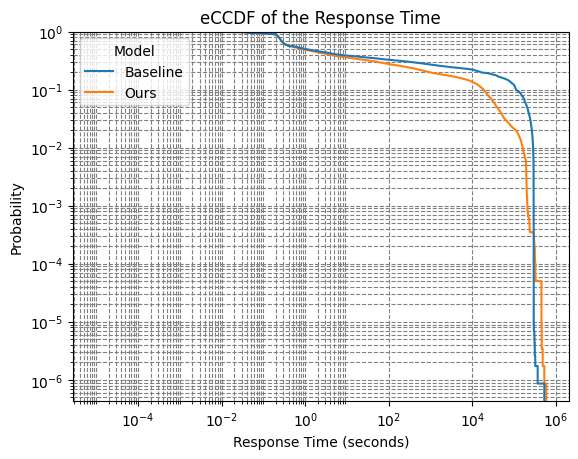

In [ ]:
g = sns.ecdfplot(data=resp_time_job_slwdwn.to_pandas(),
                 x="Response_Time",
                 hue="Model",
                 complementary=True)

# Set attributes
g.set(title="eCCDF of the Response Time",
      xscale="log",
      yscale="log",
      ylabel="Probability",
      xlabel="Response Time (seconds)")

# Grid and locators
plt.grid(True, which="both", ls="--", c='gray')

locmin = mticker.LogLocator(base=10, subs=np.arange(0.1, 1, 0.1), numticks=10)
g.xaxis.set_minor_locator(locmin)
g.xaxis.set_minor_formatter(mticker.NullFormatter())
g.yaxis.set_minor_locator(locmin)
g.yaxis.set_minor_formatter(mticker.NullFormatter())

plt.show()


In [123]:
hue_order2 = ["Baseline", "Ours"]

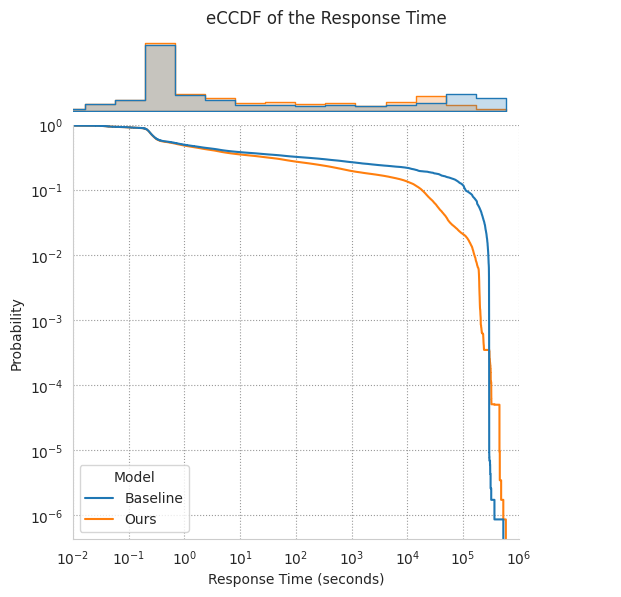

In [155]:
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
g = sns.JointGrid(data=resp_time_job_slwdwn.to_pandas(),
                  x="Response_Time",
                  hue="Model")
g.plot_joint(sns.ecdfplot,
             log_scale=(True, True),
             complementary=True)
sns.histplot(data=resp_time_job_slwdwn.to_pandas(),
             hue=g.hue,
             x=g.x,
             ax=g.ax_marg_x, 
             bins=20,
             element="step",
             legend=False)

g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("eCCDF of the Response Time")
g.ax_joint.set_xlabel("Response Time (seconds)")
g.ax_joint.set_ylabel("Probability")

g.ax_marg_y.set_axis_off()
g.ax_marg_x.set_axis_off()

g.ax_joint.set_xlim(1e-2, 1e6)

plt.show()

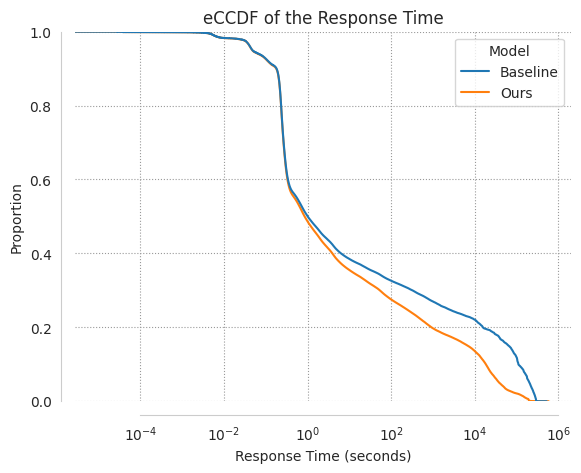

In [ ]:
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
g = sns.ecdfplot(data=resp_time_job_slwdwn.to_pandas(),
                 x="Response_Time",
                 hue="Model",
                 complementary=True)

g.set(title="eCCDF of the Response Time",
      xscale="log",
      xlabel="Response Time (seconds)")
sns.despine(trim=True, offset=10)
plt.show()

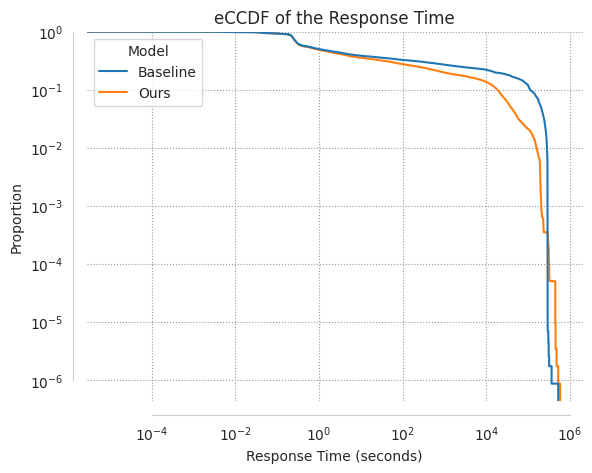

In [ ]:
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
g = sns.ecdfplot(data=resp_time_job_slwdwn.to_pandas(),
                 x="Response_Time",
                 hue="Model",
                 complementary=True)

g.set(title="eCCDF of the Response Time",
      xscale="log",
      yscale="log",
      xlabel="Response Time (seconds)")
sns.despine(trim=True, offset=10)
plt.show()

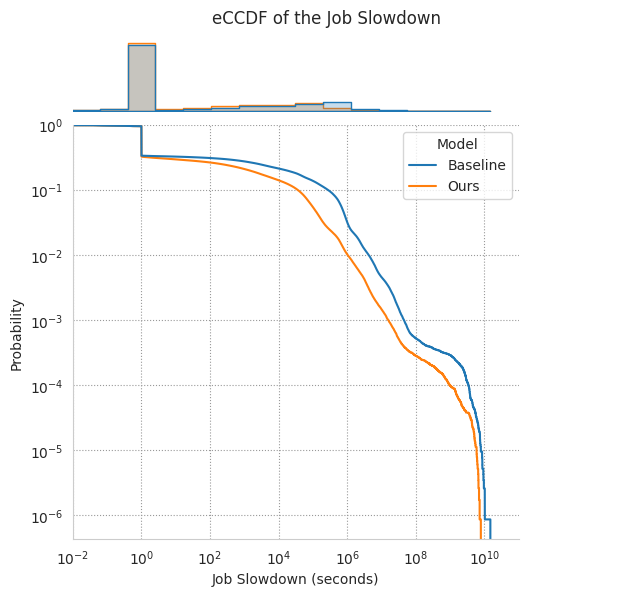

In [152]:
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
g = sns.JointGrid(data=resp_time_job_slwdwn.to_pandas(),
                  x="Job_Slowdown",
                  hue="Model")
g.plot_joint(sns.ecdfplot,
             log_scale=(True, True),
             complementary=True)
sns.histplot(data=resp_time_job_slwdwn.to_pandas(),
             hue=g.hue,
             x=g.x,
             ax=g.ax_marg_x, 
             bins=20,
             element="step",
             legend=False)

g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("eCCDF of the Job Slowdown")
g.ax_joint.set_xlabel("Job Slowdown (seconds)")
g.ax_joint.set_ylabel("Probability")

g.ax_joint.set_xlim(1e-2, 1e11)

g.ax_marg_y.set_axis_off()
g.ax_marg_x.set_axis_off()

plt.show()

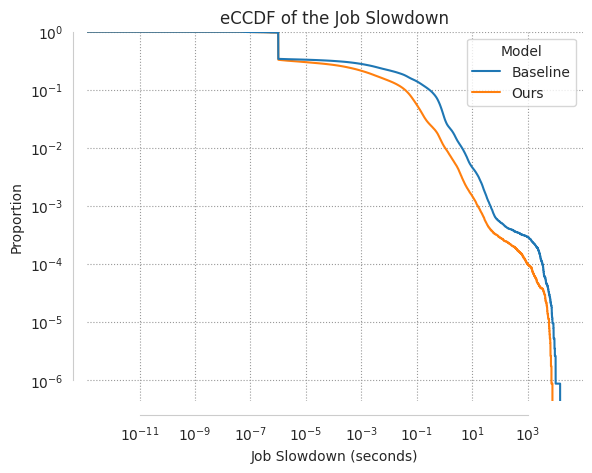

In [ ]:
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
g = sns.ecdfplot(data=resp_time_job_slwdwn.to_pandas(),
                 x="Job_Slowdown",
                 hue="Model",
                 complementary=True)

g.set(title="eCCDF of the Job Slowdown",
      xscale="log",
      yscale="log",
      xlabel="Job Slowdown (seconds)")
sns.despine(trim=True, offset=10)
plt.show()

In [ ]:
sns.histplot(data=resp_time_job_slwdwn.to_pandas(),
                 x="Job_Slowdown",
                 hue="Model")